Image credits: [Figure 18.3](https://allmodelsarewrong.github.io/lasso.html#fig:unnamed-chunk-3), Sanchez, G., Marzban, E. (2020) **All Models Are Wrong: Concepts of Statistical Learning.**

Python source: [451-blog/linreg.py at main · doabell/451-blog](https://github.com/doabell/451-blog/blob/main/posts/linear-regression/linreg.py)

Instructions can be found at [Implementing Linear Regression](https://middlebury-csci-0451.github.io/CSCI-0451/assignments/blog-posts/blog-post-linear-regression.html).

In [1]:
# make life easier
# https://stackoverflow.com/a/5399339
%load_ext autoreload
%autoreload 2


## Algorithm Demo

In [2]:
# Data
import numpy as np
from matplotlib import pyplot as plt


def pad(X):
    return np.append(X, np.ones((X.shape[0], 1)), 1)


def LR_data(n_train=100, n_val=100, p_features=1, noise=.1, w=None):
    if w is None:
        w = np.random.rand(p_features + 1) + .2

    X_train = np.random.rand(n_train, p_features)
    y_train = pad(X_train)@w + noise*np.random.randn(n_train)

    X_val = np.random.rand(n_val, p_features)
    y_val = pad(X_val)@w + noise*np.random.randn(n_val)

    return X_train, y_train, X_val, y_val


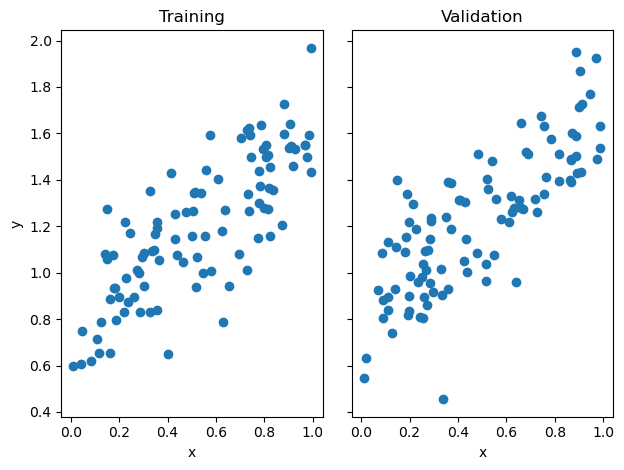

In [14]:
# Visualize
n_train = 100
n_val = 100
p_features = 1
noise = 0.2

# create some data
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)

# plot it
fig, axarr = plt.subplots(1, 2, sharex=True, sharey=True)
axarr[0].scatter(X_train, y_train)
axarr[1].scatter(X_val, y_val)
labs = axarr[0].set(title="Training", xlabel="x", ylabel="y")
labs = axarr[1].set(title="Validation", xlabel="x")
plt.tight_layout()


Training score = 0.6333
Validation score = 0.5847


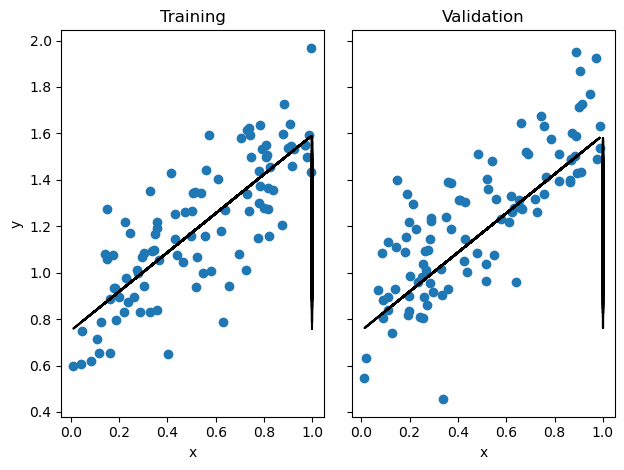

In [24]:
# Train model
from linreg import LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train)

fig, axarr = plt.subplots(1, 2, sharex=True, sharey=True)
axarr[0].scatter(X_train, y_train)
axarr[0].plot(pad(X_train), pad(X_train)@LR.w, color="black")
axarr[1].scatter(X_val, y_val)
axarr[1].plot(pad(X_val), pad(X_val)@LR.w, color="black")
labs = axarr[0].set(title="Training", xlabel="x", ylabel="y")
labs = axarr[1].set(title="Validation", xlabel="x")
plt.tight_layout()

print(f"Training score = {LR.score(X_train, y_train).round(4)}")
print(f"Validation score = {LR.score(X_val, y_val).round(4)}")


In [25]:
# Estimated weight vector
LR.w


array([0.8417985 , 0.75051382])

In [26]:
# Using gradient descent
LR2 = LinearRegression()

LR2.fit(X_train, y_train, method="gradient", alpha=0.01, max_iter=100)
LR2.w


array([-2.13337563e+19, -3.79678799e+19])

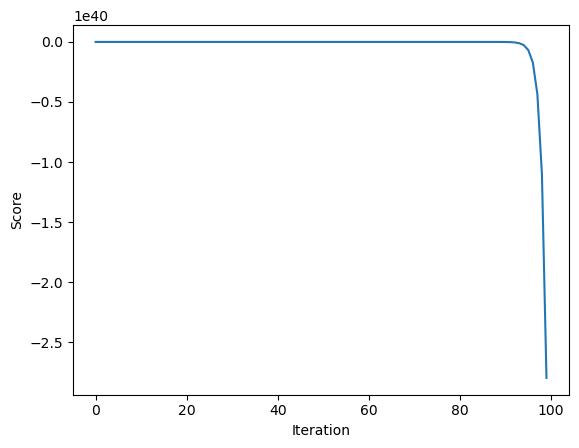

In [27]:
# score history
plt.plot(LR2.score_history)
labels = plt.gca().set(xlabel="Iteration", ylabel="Score")
